In [64]:
import pandas as pd

data = pd.read_csv('student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [65]:
# Замена строковых значений числовыми
for column in data.select_dtypes(include='object').columns:
    data[column], _ = pd.factorize(data[column])

pd.set_option('display.max_columns', None)
print(data.head())

# Подготовка данных
X = data.drop('G3', axis=1)
y = data['G3']

# Разделение данных на тренировочный и тестовый наборы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0    0   18        0        0        0     4     4     0     0   
1       0    0   17        0        0        1     1     1     0     1   
2       0    0   15        0        1        1     1     1     0     1   
3       0    0   15        0        0        1     4     2     1     2   
4       0    0   16        0        0        1     3     3     2     1   

   reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0       0         0           2          2         0          0       0     0   
1       0         1           1          2         0          1       1     0   
2       1         0           1          2         3          0       0     1   
3       2         0           1          3         0          1       1     1   
4       2         1           1          2         0          1       1     1   

   activities  nursery  higher  internet  romantic  famrel  freetime

Mean Squared Error: 3.3271788723831617


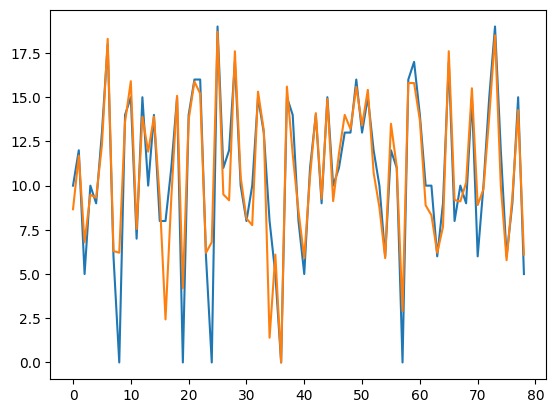

R2 для случайного леса 0.806783489352499


In [66]:
# Bagging

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Создание базовой модели (решающего дерева)
base_model = DecisionTreeRegressor(max_depth=8, random_state=42)

# Создание многозадачного бэггинга
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Обучение модели
bagging_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = bagging_model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred)
plt.show()

print('R2 для случайного леса', r2_score(y_pred, y_test))

In [67]:
# Как в методичке (почти)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Инициализация и обучение случайного леса
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Инициализация и обучение одного дерева решений
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Предсказание на тестовых данных
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# R2 для случайного леса
r2_rf = r2_score(y_test, rf_pred)
print('R2 для случайного леса:', r2_rf)

# R2 для одного дерева решений
r2_dt = r2_score(y_test, dt_pred)
print('R2 для одного дерева решений:', r2_dt)

R2 для случайного леса: 0.8273823578595317
R2 для одного дерева решений: 0.6839308598755978


In [68]:
!pip3 install catboost

In [45]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [46]:
from sklearn.metrics import get_scorer
get_scorer('r2')
scoring = make_scorer(r2_score, greater_is_better=False)

make_scorer(r2_score)

In [69]:
random_forest = RandomForestRegressor(
    # max_depth=18,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
    ).fit(X_train, y_train)

print('Выбрали сами')
y_preds_d = random_forest.predict(X_train)
print('R2 мера для тренировочных данных', r2_score(y_train, y_preds_d))
y_pred = random_forest.predict(X_test)
print('R2 мера для тестовых данных', r2_score(y_test, y_pred))

Выбрали сами
R2 мера для тренировочных данных 0.9837547295805766
R2 мера для тестовых данных 0.8273823578595317


In [80]:
# Bagging

random_forest = RandomForestRegressor(
    max_depth=18,
    min_samples_leaf=3,
    min_samples_split=6,
    random_state=42
    ).fit(X_train, y_train)

print('Выбрали сами')
y_preds_d = random_forest.predict(X_train)
print('R2 мера для тренировочных данных', r2_score(y_train, y_preds_d))
y_pred = random_forest.predict(X_test)
print('R2 мера для тестовых данных', r2_score(y_test, y_pred))

print()

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import catboost as cb
import time

start_time = time.time()
params_grid = {
  "min_samples_leaf": list(range(1, 11)),
  "min_samples_split": list(range(3, 13)),
  }
grid_search_random_forest = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid = params_grid,
    scoring = 'r2',
    cv = 5,
    ).fit(X_train, y_train)
best_model = grid_search_random_forest.best_estimator_
bagging_time = time.time() - start_time

print(best_model)

print('Выбрали оптимальное')
y_preds_d = best_model.predict(X_train)
print('R2 мера для тренировочных данных', r2_score(y_train, y_preds_d))
y_pred = best_model.predict(X_test)
bagging_accuracy = r2_score(y_test, y_pred)
print('R2 мера для тестовых данных', bagging_accuracy)

Выбрали сами
R2 мера для тренировочных данных 0.9668127526796846
R2 мера для тестовых данных 0.8200602064382723

RandomForestRegressor(min_samples_split=3, random_state=42)
Выбрали оптимальное
R2 мера для тренировочных данных 0.9816621892393484
R2 мера для тестовых данных 0.8266340853188336


In [81]:
# Boosting

start_time = time.time()
model_catboost_clf = cb.CatBoostClassifier(
    iterations=3000,
    task_type="GPU",
    devices='0',
    verbose=False
    )
model_catboost_clf.fit(X_train, y_train)
boosting_time = time.time() - start_time

y_preds_t = model_catboost_clf.predict(X_train,task_type="CPU")
print('R2 мера для тренировочных данных', r2_score(y_train, y_preds_t))
y_preds = model_catboost_clf.predict(X_test,task_type="CPU")
boosting_accuracy = r2_score(y_test, y_preds)
print('R2 мера для тестовых данных', boosting_accuracy)

R2 мера для тренировочных данных 1.0
R2 мера для тестовых данных 0.8154205607476636


In [82]:
print(f"Время обучения бэггинга: {bagging_time} сек.")
print(f"Точность бэггинга: {bagging_accuracy}")

Время обучения бэггинга: 92.10351800918579 сек.
Точность бэггинга: 0.8266340853188336


In [83]:
print(f"Время обучения бустинга: {boosting_time} сек.")
print(f"Точность бустинга: {boosting_accuracy}")

Время обучения бустинга: 32.747305154800415 сек.
Точность бустинга: 0.8154205607476636
